In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder .appName("TransportProject") .getOrCreate()
df = spark.read.parquet("/Users/lait-zet/Desktop/Syst-me-Pr-dictif-de-Transport-Urbain/data/Silver/part-00000-bdac7606-f96a-4d16-864c-9964fd46501e-c000.snappy.parquet")

data = (
    df
    .sample(fraction=0.01, seed=42)
    .limit(10000)                     
    .toPandas()
)
data

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/07 09:47:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration_minute,pickuphour,dayof_week,month
0,1,2025-01-01 00:24:02,2025-01-01 00:35:10,1,1.20,1,N,164,233,1,...,0.0,1.0,18.00,2.5,0.0,0.00,11.133333,0,4,1
1,2,2025-01-01 00:46:47,2025-01-01 01:02:28,1,1.58,1,N,137,79,2,...,0.0,1.0,17.10,2.5,0.0,0.00,15.683333,0,4,1
2,2,2025-01-01 00:07:04,2025-01-01 00:10:01,1,0.47,1,N,163,237,1,...,0.0,1.0,12.12,2.5,0.0,0.00,2.950000,0,4,1
3,1,2025-01-01 00:54:20,2025-01-01 01:00:10,1,1.10,1,N,142,50,1,...,0.0,1.0,15.85,2.5,0.0,0.00,5.833333,0,4,1
4,2,2025-01-01 00:49:51,2025-01-01 00:56:50,1,1.57,1,N,236,238,1,...,0.0,1.0,18.00,2.5,0.0,0.00,6.983333,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2025-01-12 00:33:51,2025-01-12 00:40:05,1,1.40,1,N,249,186,1,...,0.0,1.0,16.35,2.5,0.0,0.75,6.233333,0,1,1
9996,1,2025-01-12 00:47:25,2025-01-12 00:56:25,1,1.20,1,N,148,249,1,...,0.0,1.0,18.05,2.5,0.0,0.75,9.000000,0,1,1
9997,2,2025-01-12 00:35:51,2025-01-12 00:43:21,2,1.21,1,N,148,107,1,...,0.0,1.0,16.05,2.5,0.0,0.75,7.500000,0,1,1
9998,2,2025-01-12 00:00:31,2025-01-12 00:07:31,1,1.62,1,N,158,100,1,...,0.0,1.0,19.50,2.5,0.0,0.75,7.000000,0,1,1


In [3]:
cat_cols = data.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"])
cat_cols.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               10000 non-null  int32  
 1   passenger_count        10000 non-null  int64  
 2   trip_distance          10000 non-null  float64
 3   RatecodeID             10000 non-null  int64  
 4   PULocationID           10000 non-null  int32  
 5   DOLocationID           10000 non-null  int32  
 6   payment_type           10000 non-null  int64  
 7   fare_amount            10000 non-null  float64
 8   extra                  10000 non-null  float64
 9   mta_tax                10000 non-null  float64
 10  tip_amount             10000 non-null  float64
 11  tolls_amount           10000 non-null  float64
 12  improvement_surcharge  10000 non-null  float64
 13  total_amount           10000 non-null  float64
 14  congestion_surcharge   10000 non-null  float64
 15  Air

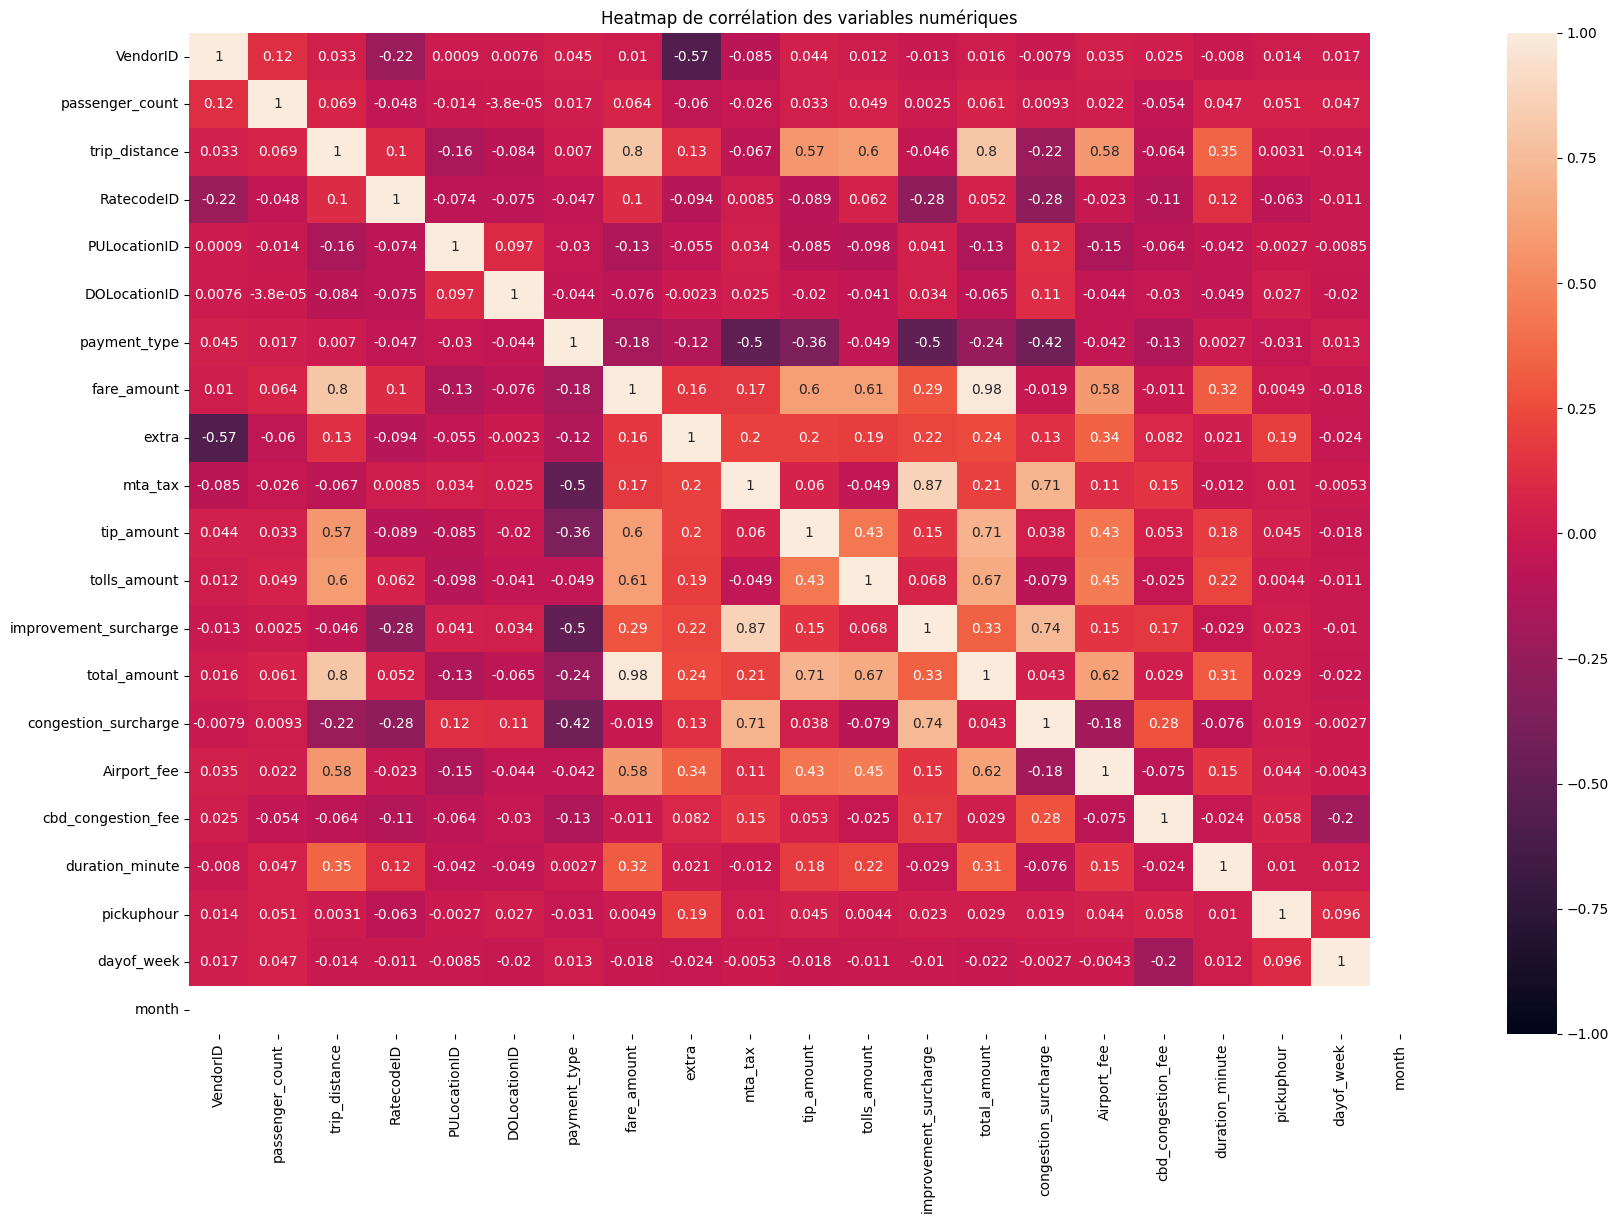

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


corr =cat_cols.corr()

plt.figure(figsize=(20, 13))
sns.heatmap(corr, vmax=1 , vmin=-1 , annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()



/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_13112/258289059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df1 , data = data , palette='husl')


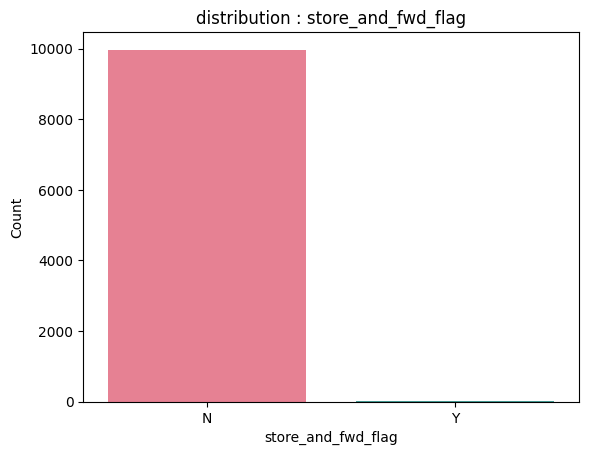

In [5]:
df1 = data["store_and_fwd_flag"] 
sns.countplot(x = df1 , data = data , palette='husl')
plt.title(f"distribution : store_and_fwd_flag")
plt.xlabel("store_and_fwd_flag")
plt.ylabel("Count")
plt.show()


Finale Data 

In [9]:
cat_cols.head(1)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration_minute,pickuphour,dayof_week,month
0,1,1,1.2,1,164,233,1,10.0,3.5,0.5,...,0.0,1.0,18.0,2.5,0.0,0.0,11.133333,0,4,1


In [14]:
data_finale = data.drop(columns=["VendorID","PULocationID","DOLocationID","payment_type",
   "extra","mta_tax","improvement_surcharge","congestion_surcharge","cbd_congestion_fee","pickuphour","dayof_week","month"
   ,"tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"])

data_finale

,passenger_count,trip_distance,RatecodeID,fare_amount,tip_amount,tolls_amount,total_amount,Airport_fee,duration_minute
0,1,1.20,1,10.0,3.00,0.0,18.00,0.0,11.133333
1,1,1.58,1,12.1,0.00,0.0,17.10,0.0,15.683333
2,1,0.47,1,5.1,2.02,0.0,12.12,0.0,2.950000
3,1,1.10,1,7.2,3.65,0.0,15.85,0.0,5.833333
4,1,1.57,1,10.0,3.00,0.0,18.00,0.0,6.983333
...,...,...,...,...,...,...,...,...,...
9995,1,1.40,1,8.6,2.00,0.0,16.35,0.0,6.233333
9996,1,1.20,1,9.3,3.00,0.0,18.05,0.0,9.000000
9997,2,1.21,1,9.3,1.00,0.0,16.05,0.0,7.500000
9998,1,1.62,1,10.0,3.75,0.0,19.50,0.0,7.000000
